## Credit Card Fraud Detection
#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset Link
https://www.kaggle.com/mlg-ulb/creditcardfraud/data

![alt text](http://wesb.com/wp-content/uploads/2018/04/creditcardfraud1280.jpg)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
df.shape

(284807, 31)

In [33]:
#For value counts of both the classes
x = df['Class'].value_counts(normalize=True)
print("Value Counts:")
print(x)
y = df.shape
fraudper = (x[1]/y[0])*100
print(fraudper,"% of fraud points only")

Value Counts:
0    0.998273
1    0.001727
Name: Class, dtype: float64
6.06546057723e-07 % of fraud points only


Extremely Unbalanced Dataset

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Dataset has all numerical features of which amount and time is given rest all 28 features are anonymized Principal Components transformed usign PCA. The output class can be either 1(in case of fraud) and otherwise 0.


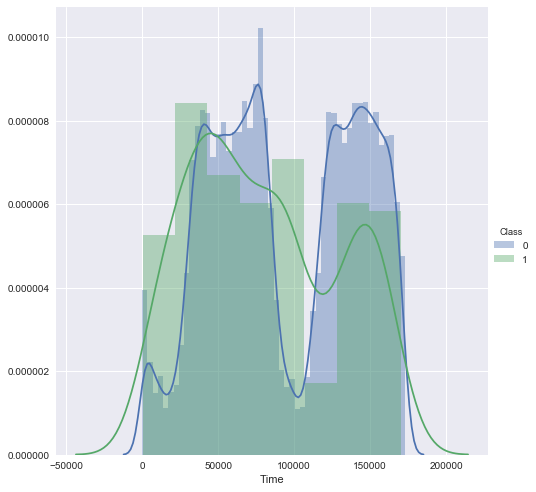

In [19]:
#Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=7)
 .map(sns.distplot,"Time")
 .add_legend())

plt.show()

Using time we can't distinguish and find the fraudulent transactions as it happens anytime of the day

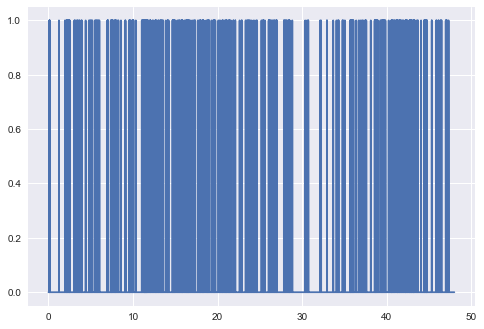

In [20]:
def sectohours(sec):
    hours = sec/(60*60)
    return hours
hours = sectohours(df['Time'])
plt.plot(hours,df['Class'])
plt.show()

Frauds happened between all the hours and most of them did not happen at a particular time

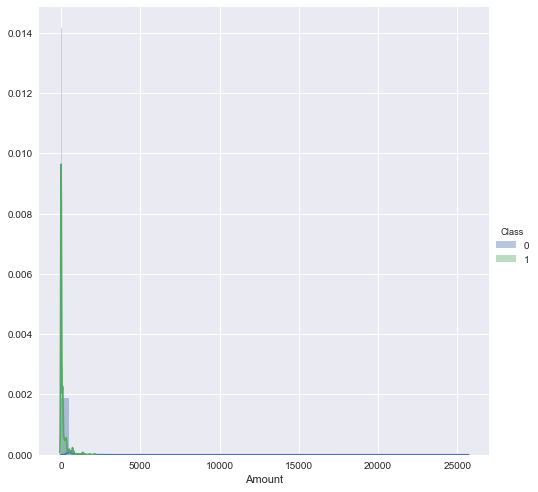

In [21]:
#Plotting according to Amount 
(sns.FacetGrid(df,hue="Class",size=7)
 .map(sns.distplot,"Amount")
 .add_legend())
plt.show()

Most of the transactions are below 2000 dollars for both fraud and normal transactions

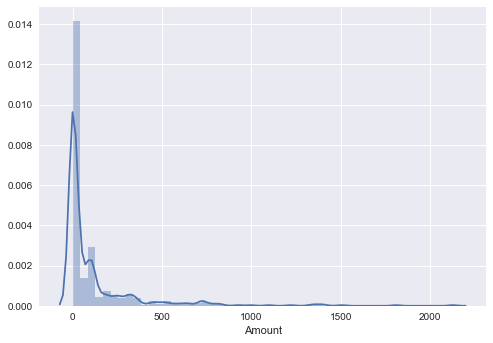

In [34]:
fraud=df.loc[df["Class"]==1]
normal=df.loc[df["Class"]==0]
sns.distplot(fraud.Amount)
plt.show()

All of the fraud transactions are below 2400 dollars and Most of them are below 500$

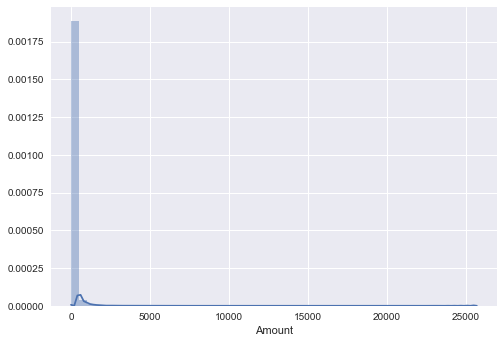

In [35]:
sns.distplot(normal.Amount)
plt.show()

We can observe that normal transactions are bit more spread than the fraud transactions in terms of amount and the non-fraud transactions mostly below 1000$

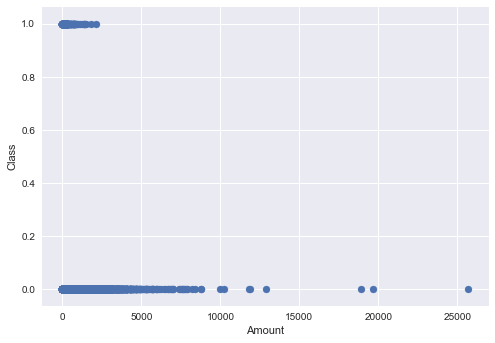

In [40]:
plt.scatter(df['Amount'],df['Class'])
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

From the scatter plot we can obeserve that only few points in normal transactions are above 10,000$

#### Correlation between features

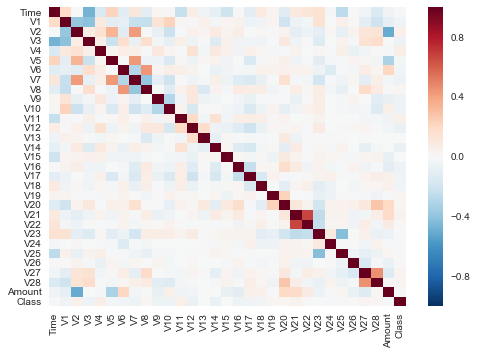

In [38]:
#Using Spearman Correlation Coefficient to see how much the features are co-related to each other
ax = sns.heatmap(df.corr(method='spearman'))
plt.show()

It seems the features are quite not related to each other as no points are dark orange and very few are light orange
 which means few slightly related

## Task 2 (Similarity between transactions)
As the defined metric is cosine similarity <br>
similarity(i,j) = cosine^-1(dot product (vi, vj) / (length(vi) * length(vj)) )

![alt text](http://dataaspirant.com/wp-content/uploads/2015/04/cosine.png)

In [89]:
#Sampling 100 random datapoints/rows from the table
sample100 = df.sample(100)
sample100.shape

(100, 31)

In [94]:
sample100.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188683,128084.0,-0.987732,0.829048,-0.278654,-0.658676,0.718651,-0.724522,0.639614,0.405337,0.034758,...,-0.123534,-0.578908,-0.098380,0.430990,0.121634,-0.110285,-0.039287,0.052682,50.00,0
265071,161725.0,0.139373,1.019850,-0.423320,-0.555768,0.941496,-0.732687,0.962232,-0.078788,-0.033887,...,-0.338328,-0.824810,0.102578,0.496757,-0.434156,0.119641,0.224406,0.083331,4.86,0
237144,149119.0,-0.700779,-0.873922,1.201566,-2.915576,0.088651,0.039793,-0.230744,-0.032565,-2.034376,...,-0.209007,-0.299602,-0.390099,0.120245,0.606216,-0.092116,-0.315913,-0.115263,25.00,0
32509,36831.0,1.329336,-0.776614,0.857839,-0.808990,-1.329647,-0.218506,-1.135750,0.115582,-0.596712,...,0.416436,1.080589,-0.163378,0.052609,0.427258,-0.047332,0.029082,0.014147,24.99,0
215209,139975.0,-0.306139,0.393265,0.458180,-2.074616,1.260777,-0.375036,1.076943,-0.226760,-0.096903,...,-0.288949,-0.763818,-0.253557,-1.152125,-0.207175,0.567844,-0.164273,-0.132270,4.00,0


In [102]:
#Indexes of the 100 sampled datavalues
sample100.index

Int64Index([188683, 265071, 237144,  32509, 215209, 118344,  40494, 130317,
             66630, 188565, 262849,  70036, 226918, 280775, 150474, 221937,
            283261,  98197,  51068, 169994, 193261,  31405,  18411, 211841,
            178302,  19151, 219387, 263690, 135458, 106668, 114354,  54997,
            176946, 159680,  22093,  14436, 175445, 229757, 193039, 206114,
            131336, 192003, 252739, 136128,  62510, 189740, 243797,  24128,
            107141,  78808, 157068, 178714, 184081, 150939,  36672, 228181,
            178762,   9354, 261118,  64881, 179261,  56198,  74617, 267183,
             78371,  81645, 278461,  83762, 198086, 210356,  96707, 237323,
            223671,  78567, 208406,  82731, 269968,  56350,  53421, 127328,
            110943, 166768,  82236, 153129, 104065,  12547, 243484, 133458,
            122824,  23095, 215325, 216983, 205292, 266614,  20224,  74323,
            156470, 194364, 195244, 118755],
           dtype='int64')

In [91]:
#importing cosine similarity to calculate cosine similarity of each data point with the every other datapoint
from sklearn.metrics.pairwise import cosine_similarity
similar = cosine_similarity(sample100)
print(similar.shape)

(100, 100)


In [96]:
#Cosine Similarity Matrix 
print(similar)

[[ 1.          0.99999993  0.99999997 ...,  0.99999998  0.99997891
   0.99999999]
 [ 0.99999993  1.          0.99999999 ...,  0.99999998  0.99997651
   0.99999987]
 [ 0.99999997  0.99999999  1.         ...,  1.          0.99997744
   0.99999993]
 ..., 
 [ 0.99999998  0.99999998  1.         ...,  1.          0.99997775
   0.99999995]
 [ 0.99997891  0.99997651  0.99997744 ...,  0.99997775  1.          0.99997982]
 [ 0.99999999  0.99999987  0.99999993 ...,  0.99999995  0.99997982  1.        ]]


In [157]:
similar.shape

(100, 100)

In [93]:
similar.min()

0.99829552221692508

In [160]:
similarity_arr = []
#zip to iterate through to arrays parallelly
for trans_array,head in zip(similar,sample100.index):
    l = []
    #trans_array is the list with similarity values of all points w.r.t. head
    #Making a tuple as (transaction_id,similarity with head)
    for trans_elt,index in zip(trans_array,sample100.index):
        l.append((index,trans_elt))
    
    #Sort the transactions according to the similarity(ascending order)
    new_list = sorted(l,key=lambda x:x[1])
    #Creating a tuple (head,list of tuple of (transaction_id,similarity with head))
    similarity_arr.append((head,new_list))    

similarity_arr[:2]     

[(188683,
  [(12547, 0.99831796694053521),
   (54997, 0.99950694023604481),
   (51068, 0.9999117661085376),
   (9354, 0.99991284391925817),
   (70036, 0.9999286701745923),
   (195244, 0.99997891329255273),
   (31405, 0.99997915123851),
   (40494, 0.99998306735176412),
   (269968, 0.99999128511027457),
   (78371, 0.99999179779641367),
   (20224, 0.99999345495829395),
   (159680, 0.99999513103373139),
   (64881, 0.99999590326008481),
   (22093, 0.99999675749470507),
   (127328, 0.99999795981556228),
   (178714, 0.99999821498119923),
   (98197, 0.99999823764887474),
   (169994, 0.99999890153970505),
   (211841, 0.9999992175713377),
   (24128, 0.99999926169661013),
   (82731, 0.99999950198770593),
   (229757, 0.99999963561337646),
   (14436, 0.99999967670473155),
   (81645, 0.99999968246715709),
   (198086, 0.99999968862503708),
   (53421, 0.99999975169860178),
   (215325, 0.99999979552206208),
   (18411, 0.99999981139672312),
   (110943, 0.99999982121969311),
   (267183, 0.999999823989188

In [155]:
#Printing the top 10 least similar transactions with respect to each transaction.
for trans in similarity_arr:
    print("--------------------------------------")
    print("Given transactions id=",trans[0],"Class:",int(sample100.loc[trans[0]].Class))
    print("--------------------------------------")
    print("Similar Transations:")
    print("--------------------")
    for elt in trans[1][:10]:
        print("Transaction id:=",elt[0],"Similarity:",elt[1],"Class:",int(sample100.loc[elt[0]].Class))
    print("\n")

--------------------------------------
Given transactions id= 188683 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 12547 Similarity: 0.998317966941 Class: 0
Transaction id:= 54997 Similarity: 0.999506940236 Class: 0
Transaction id:= 51068 Similarity: 0.999911766109 Class: 0
Transaction id:= 9354 Similarity: 0.999912843919 Class: 0
Transaction id:= 70036 Similarity: 0.999928670175 Class: 0
Transaction id:= 195244 Similarity: 0.999978913293 Class: 0
Transaction id:= 31405 Similarity: 0.999979151239 Class: 0
Transaction id:= 40494 Similarity: 0.999983067352 Class: 0
Transaction id:= 269968 Similarity: 0.99999128511 Class: 0
Transaction id:= 78371 Similarity: 0.999991797796 Class: 0


--------------------------------------
Given transactions id= 265071 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 12547 Similarity: 0.998297012638 Class: 0
Transaction id:= 54997 Similari

Transaction id:= 40494 Similarity: 0.999994628176 Class: 0
Transaction id:= 278461 Similarity: 0.999995700399 Class: 0
Transaction id:= 243797 Similarity: 0.999995707313 Class: 0


--------------------------------------
Given transactions id= 14436 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 12547 Similarity: 0.998363536861 Class: 0
Transaction id:= 54997 Similarity: 0.999531475403 Class: 0
Transaction id:= 51068 Similarity: 0.999921964816 Class: 0
Transaction id:= 9354 Similarity: 0.999922973282 Class: 0
Transaction id:= 70036 Similarity: 0.999937799734 Class: 0
Transaction id:= 195244 Similarity: 0.999983731281 Class: 0
Transaction id:= 31405 Similarity: 0.999983939046 Class: 0
Transaction id:= 40494 Similarity: 0.999987356745 Class: 0
Transaction id:= 269968 Similarity: 0.999994265563 Class: 0
Transaction id:= 78371 Similarity: 0.99999467486 Class: 0


--------------------------------------
Given transactions id= 175445 

Transaction id:= 51068 Similarity: 0.999957350906 Class: 0
Transaction id:= 9354 Similarity: 0.999958086458 Class: 0
Transaction id:= 70036 Similarity: 0.999968813829 Class: 0
Transaction id:= 278461 Similarity: 0.999990162102 Class: 0
Transaction id:= 243797 Similarity: 0.999990168381 Class: 0
Transaction id:= 208406 Similarity: 0.999990174375 Class: 0
Transaction id:= 156470 Similarity: 0.999990175235 Class: 0
Transaction id:= 184081 Similarity: 0.999990176937 Class: 0


--------------------------------------
Given transactions id= 81645 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 12547 Similarity: 0.998363759114 Class: 0
Transaction id:= 54997 Similarity: 0.99953159493 Class: 0
Transaction id:= 51068 Similarity: 0.999922013245 Class: 0
Transaction id:= 9354 Similarity: 0.999923025769 Class: 0
Transaction id:= 70036 Similarity: 0.999937847205 Class: 0
Transaction id:= 195244 Similarity: 0.999983760835 Class: 0
Transaction

Transaction id:= 31405 Similarity: 0.999977256893 Class: 0
Transaction id:= 40494 Similarity: 0.999981354917 Class: 0
Transaction id:= 269968 Similarity: 0.999990045588 Class: 0
Transaction id:= 78371 Similarity: 0.999990596343 Class: 0


--------------------------------------
Given transactions id= 205292 Class: 0
--------------------------------------
Similar Transations:
--------------------
Transaction id:= 12547 Similarity: 0.998319264375 Class: 0
Transaction id:= 54997 Similarity: 0.999507642385 Class: 0
Transaction id:= 51068 Similarity: 0.99991206391 Class: 0
Transaction id:= 9354 Similarity: 0.999913140873 Class: 0
Transaction id:= 70036 Similarity: 0.999928936413 Class: 0
Transaction id:= 195244 Similarity: 0.999979058713 Class: 0
Transaction id:= 31405 Similarity: 0.999979296054 Class: 0
Transaction id:= 40494 Similarity: 0.999983196624 Class: 0
Transaction id:= 269968 Similarity: 0.99999137871 Class: 0
Transaction id:= 78371 Similarity: 0.999991889207 Class: 0


-----------